In [1]:
import talib
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import quandl
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime
import selenium

In [2]:
from fake_useragent import UserAgent
ua = UserAgent()

ua.ie
# Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US);
ua.msie
# Mozilla/5.0 (compatible; MSIE 10.0; Macintosh; Intel Mac OS X 10_7_3; Trident/6.0)'
ua['Internet Explorer']
# Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; GTB7.4; InfoPath.2; SV1; .NET CLR 3.3.69573; WOW64; en-US)
ua.opera
# Opera/9.80 (X11; Linux i686; U; ru) Presto/2.8.131 Version/11.11
ua.chrome
# Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.2 (KHTML, like Gecko) Chrome/22.0.1216.0 Safari/537.2'
ua.google
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4) AppleWebKit/537.13 (KHTML, like Gecko) Chrome/24.0.1290.1 Safari/537.13
ua['google chrome']
# Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11
ua.firefox
# Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16.0.1) Gecko/20121011 Firefox/16.0.1
ua.ff
# Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0) Gecko/20100101 Firefox/15.0.1
ua.safari
# Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25

# and the best one, random via real world browser usage statistic
ua.random

'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'

In [3]:
hzo = yf.Ticker("HZO")

test = pd.DataFrame(hzo.history(start="1998-7-22", end="2021-09-30", interval="1d").values)

test.columns = ['Open','High','Low','Close','Volume','Dividends','Stock Splits']

test = test.drop('Dividends', axis = 1)

test = test.drop('Stock Splits', axis = 1)

Open = test['Open']
High = test["High"]
Low = test['Low']
Close = test['Close']
Volume = test['Volume']

print(test)

Final = test[4:]

Final

           Open       High        Low      Close    Volume
0     11.687500  12.000000  11.562500  11.875000   23000.0
1     11.937500  11.937500  11.562500  11.562500    7800.0
2     11.500000  11.500000  11.000000  11.125000   35700.0
3     11.000000  11.000000  10.625000  10.812500   24700.0
4     11.000000  11.125000  10.812500  10.875000   29000.0
...         ...        ...        ...        ...       ...
5831  50.419998  52.000000  50.299999  51.099998  285800.0
5832  50.570000  51.369999  50.049999  50.070000  220700.0
5833  50.349998  51.599998  50.310001  51.130001  213600.0
5834  51.040001  51.740002  49.380001  49.560001  228900.0
5835  50.380001  51.000000  49.869999  50.200001  120800.0

[5836 rows x 5 columns]


,Open,High,Low,Close,Volume
4,11.000000,11.125000,10.812500,10.875000,29000.0
5,11.062500,11.062500,10.750000,10.937500,10000.0
6,10.812500,10.812500,10.375000,10.625000,9900.0
7,10.500000,10.750000,10.500000,10.750000,19200.0
8,10.625000,10.875000,10.625000,10.875000,13100.0
...,...,...,...,...,...
5831,50.419998,52.000000,50.299999,51.099998,285800.0
5832,50.570000,51.369999,50.049999,50.070000,220700.0
5833,50.349998,51.599998,50.310001,51.130001,213600.0
5834,51.040001,51.740002,49.380001,49.560001,228900.0


In [4]:
HZO = hzo.history(start="1998-7-22", end="2021-09-30", interval="1d")

HZO

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-07-22,11.687500,12.000000,11.562500,11.875000,23000,0,0
1998-07-23,11.937500,11.937500,11.562500,11.562500,7800,0,0
1998-07-24,11.500000,11.500000,11.000000,11.125000,35700,0,0
1998-07-27,11.000000,11.000000,10.625000,10.812500,24700,0,0
1998-07-28,11.000000,11.125000,10.812500,10.875000,29000,0,0
...,...,...,...,...,...,...,...
2021-09-23,50.419998,52.000000,50.299999,51.099998,285800,0,0
2021-09-24,50.570000,51.369999,50.049999,50.070000,220700,0,0
2021-09-27,50.349998,51.599998,50.310001,51.130001,213600,0,0


In [5]:
# ROC Input

ROC = talib.ROC(test['Close'],timeperiod=5).values

ROC = pd.DataFrame(ROC[10:])

ROC.columns = ["ROC"]

ROC

,ROC
0,-9.142857
1,-4.117647
2,-6.395349
3,-12.643678
4,-3.947368
...,...
5821,3.232320
5822,-0.079826
5823,5.487930
5824,4.227134


In [6]:
# BOP Indicator

## Note, BOP needs to be staggered off the dataset IE

### Attach to 5:

BOP = talib.BOP(Open, High, Low, Close)

BOP = pd.DataFrame(BOP[9:].values)

BOP.columns = ['BOP DAY PRIOR']

BOP = BOP[:-1]

BOP

,BOP DAY PRIOR
0,-1.000000
1,0.600000
2,1.000000
3,0.000000
4,-1.000000
...,...
5821,0.808989
5822,0.400000
5823,-0.378788
5824,0.604655


In [7]:
#RSI Indicator

## Attach to 5:

RSI = talib.RSI(test["Close"], timeperiod = 4)

RSI = pd.DataFrame(RSI[9:].values)

RSI.columns = ["RSI CLOSE DAY PRIOR"]

RSI = RSI[:-1]

RSI 

,RSI CLOSE DAY PRIOR
0,10.148407
1,30.775698
2,41.081237
3,37.372135
4,24.240514
...,...
5821,63.453733
5822,72.461081
5823,57.117448
5824,66.772068


In [8]:
#MFI Indicator

## Attach to 5:

MFI = talib.MFI(High, Low, Close, Volume,timeperiod=2)

MFI = pd.DataFrame(MFI[9:].values)

MFI.columns = ['MFI DAY PRIOR']

MFI = MFI[:-1]

MFI

,MFI DAY PRIOR
0,29.212622
1,0.000000
2,23.037665
3,25.156131
4,0.000000
...,...
5821,55.709070
5822,100.000000
5823,56.734261
5824,49.437037


In [9]:
PPO = talib.PPO(test['Close'], slowperiod = 5, fastperiod = 2, matype = 1 ).values

PPO = pd.DataFrame(PPO[9:5835])
PPO.columns = ['PPO DAY PRIOR']

PPO

,PPO DAY PRIOR
0,-4.635979
1,-3.159473
2,-1.304196
3,-1.013114
4,-2.621874
...,...
5821,0.681390
5822,1.705641
5823,0.862114
5824,1.183320


In [10]:
MOM = talib.MOM(test['Close'],timeperiod= 4).values

MOM = pd.DataFrame(MOM[9:5835])

MOM.columns = ['Momentum']

MOM

,Momentum
0,-1.437500
1,-0.687500
2,-0.562500
3,-0.812500
4,0.000000
...,...
5821,0.340000
5822,0.989998
5823,1.599998
5824,3.580002


In [11]:
REAL = talib.ADOSC(High, Low, Close, Volume, fastperiod=2, slowperiod=3).values

REAL = pd.DataFrame(REAL[9:5835])

REAL.columns = ['ADOSC DAY BEFORE']

REAL

,ADOSC DAY BEFORE
0,-2429.648635
1,3434.959942
2,5050.741391
3,1864.235613
4,-3138.260554
...,...
5821,24755.927480
5822,15647.927403
5823,-26754.709510
5824,-15244.579558


In [12]:
ULTOSC = talib.ULTOSC(High, Low, Close, timeperiod1=2, timeperiod2=3, timeperiod3=4).values

ULTOSC = pd.DataFrame(ULTOSC[9:5835])

ULTOSC.columns = ['ULTOSC DAY BEFORE']

ULTOSC

,ULTOSC DAY BEFORE
0,20.805861
1,35.396825
2,74.682540
3,62.585034
4,24.523377
...,...
5821,51.266241
5822,63.660697
5823,43.857617
5824,43.467928


In [13]:
AROON = pd.DataFrame(talib.AROONOSC(High,Low,timeperiod=4).values)

AROON = pd.DataFrame(AROON[9:5835].values)

AROON.columns = ['AROON']

AROON

,AROON
0,-100.0
1,-25.0
2,-25.0
3,-25.0
4,-25.0
...,...
5821,25.0
5822,50.0
5823,50.0
5824,50.0


In [14]:
#ATR = talib.ATR(High,Low,Close,timeperiod=5).values

#ATR = pd.DataFrame(ATR[9:5835])

#ATR.columns = ["ATR DAY BEFORE"]

#ATR

In [15]:
#df = pd.DataFrame([ROC,BOP,rsi,MFI],reshape(5831,))

df = pd.concat([ROC,BOP,RSI,MFI,PPO,MOM,REAL,ULTOSC,AROON],axis=1)

df

,ROC,BOP DAY PRIOR,RSI CLOSE DAY PRIOR,MFI DAY PRIOR,PPO DAY PRIOR,Momentum,ADOSC DAY BEFORE,ULTOSC DAY BEFORE,AROON
0,-9.142857,-1.000000,10.148407,29.212622,-4.635979,-1.437500,-2429.648635,20.805861,-100.0
1,-4.117647,0.600000,30.775698,0.000000,-3.159473,-0.687500,3434.959942,35.396825,-25.0
2,-6.395349,1.000000,41.081237,23.037665,-1.304196,-0.562500,5050.741391,74.682540,-25.0
3,-12.643678,0.000000,37.372135,25.156131,-1.013114,-0.812500,1864.235613,62.585034,-25.0
4,-3.947368,-1.000000,24.240514,0.000000,-2.621874,0.000000,-3138.260554,24.523377,-25.0
...,...,...,...,...,...,...,...,...,...
5821,3.232320,0.808989,63.453733,55.709070,0.681390,0.340000,24755.927480,51.266241,25.0
5822,-0.079826,0.400000,72.461081,100.000000,1.705641,0.989998,15647.927403,63.660697,50.0
5823,5.487930,-0.378788,57.117448,56.734261,0.862114,1.599998,-26754.709510,43.857617,50.0
5824,4.227134,0.604655,66.772068,49.437037,1.183320,3.580002,-15244.579558,43.467928,50.0


In [16]:
df.corr()['ROC'].sort_values()

BOP DAY PRIOR          0.304059
ADOSC DAY BEFORE       0.433867
MFI DAY PRIOR          0.470054
ULTOSC DAY BEFORE      0.505395
AROON                  0.594989
RSI CLOSE DAY PRIOR    0.660505
Momentum               0.680420
PPO DAY PRIOR          0.813274
ROC                    1.000000
Name: ROC, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

X = df[['RSI CLOSE DAY PRIOR',"BOP DAY PRIOR","MFI DAY PRIOR","PPO DAY PRIOR",'Momentum','ADOSC DAY BEFORE','ULTOSC DAY BEFORE','AROON']].values

y = df['ROC'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = Sequential()

model.add(Dense(9,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(9,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')

model.compile(optimizer='adam',loss='mse')

In [19]:
from keras.callbacks import History 
history = History()

early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=20, restore_best_weights=False)

EarlyStopping()
model.fit(x= X_train,y= y_train,validation_data = (X_test,y_test),batch_size=32,epochs=2000,callbacks=[early_stop])

Epoch 1/2000
128/128 [==============================] - 0s 2ms/step - loss: 62.6206 - val_loss: 68.2128
Epoch 2/2000
128/128 [==============================] - 0s 866us/step - loss: 56.9680 - val_loss: 61.5588
Epoch 3/2000
128/128 [==============================] - 0s 882us/step - loss: 49.9384 - val_loss: 54.1453
Epoch 4/2000
128/128 [==============================] - 0s 921us/step - loss: 44.1322 - val_loss: 49.6292
Epoch 5/2000
128/128 [==============================] - 0s 929us/step - loss: 41.3004 - val_loss: 47.8852
Epoch 6/2000
128/128 [==============================] - 0s 937us/step - loss: 39.9862 - val_loss: 46.8641
Epoch 7/2000
128/128 [==============================] - 0s 969us/step - loss: 39.2385 - val_loss: 46.2044
Epoch 8/2000
128/128 [==============================] - 0s 976us/step - loss: 38.6948 - val_loss: 45.6248
Epoch 9/2000
128/128 [==============================] - 0s 986us/step - loss: 38.2542 - val_loss: 45.3228
Epoch 10/2000
128/128 [=========================

Epoch 79/2000
128/128 [==============================] - 0s 1ms/step - loss: 23.0812 - val_loss: 25.6071
Epoch 80/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.9901 - val_loss: 25.4861
Epoch 81/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.8877 - val_loss: 25.4463
Epoch 82/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.6775 - val_loss: 25.1296
Epoch 83/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.6474 - val_loss: 24.9674
Epoch 84/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.4762 - val_loss: 24.9027
Epoch 85/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.3592 - val_loss: 24.6757
Epoch 86/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.2465 - val_loss: 24.4980
Epoch 87/2000
128/128 [==============================] - 0s 1ms/step - loss: 22.1821 - val_loss: 24.6074
Epoch 88/2000
128/128 [==============================] 

128/128 [==============================] - 0s 929us/step - loss: 20.6266 - val_loss: 21.4981
Epoch 156/2000
128/128 [==============================] - 0s 976us/step - loss: 20.5369 - val_loss: 21.4833
Epoch 157/2000
128/128 [==============================] - 0s 937us/step - loss: 20.4757 - val_loss: 21.4860
Epoch 158/2000
128/128 [==============================] - 0s 898us/step - loss: 20.4812 - val_loss: 21.5016
Epoch 159/2000
128/128 [==============================] - 0s 890us/step - loss: 20.4286 - val_loss: 21.4873
Epoch 160/2000
128/128 [==============================] - 0s 898us/step - loss: 20.4026 - val_loss: 21.9965
Epoch 161/2000
128/128 [==============================] - 0s 921us/step - loss: 20.4768 - val_loss: 21.6365
Epoch 162/2000
128/128 [==============================] - 0s 921us/step - loss: 20.6850 - val_loss: 21.4611
Epoch 163/2000
128/128 [==============================] - 0s 1ms/step - loss: 20.5647 - val_loss: 21.4900
Epoch 164/2000
128/128 [=====================

128/128 [==============================] - 0s 835us/step - loss: 20.2754 - val_loss: 21.3522
Epoch 232/2000
128/128 [==============================] - 0s 835us/step - loss: 20.2980 - val_loss: 21.4559
Epoch 233/2000
128/128 [==============================] - 0s 882us/step - loss: 20.2939 - val_loss: 21.5984
Epoch 234/2000
128/128 [==============================] - 0s 858us/step - loss: 20.3950 - val_loss: 21.3336
Epoch 235/2000
128/128 [==============================] - 0s 850us/step - loss: 20.2970 - val_loss: 21.4659
Epoch 236/2000
128/128 [==============================] - 0s 843us/step - loss: 20.3109 - val_loss: 21.3548
Epoch 237/2000
128/128 [==============================] - 0s 827us/step - loss: 20.3779 - val_loss: 22.1602
Epoch 238/2000
128/128 [==============================] - 0s 827us/step - loss: 20.2843 - val_loss: 21.3343
Epoch 239/2000
128/128 [==============================] - 0s 827us/step - loss: 20.2186 - val_loss: 22.0679
Epoch 240/2000
128/128 [===================

Epoch 308/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.1869 - val_loss: 21.2211
Epoch 309/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.2102 - val_loss: 21.1384
Epoch 310/2000
128/128 [==============================] - 0s 2ms/step - loss: 20.1637 - val_loss: 21.4856
Epoch 311/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.2368 - val_loss: 21.1411
Epoch 312/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.3082 - val_loss: 21.6893
Epoch 313/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.1582 - val_loss: 22.3704
Epoch 314/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.2213 - val_loss: 21.2427
Epoch 315/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.2852 - val_loss: 21.7171
Epoch 316/2000
128/128 [==============================] - 0s 3ms/step - loss: 20.3393 - val_loss: 21.5080
Epoch 317/2000
128/128 [======================

128/128 [==============================] - 0s 1000us/step - loss: 20.0934 - val_loss: 21.1788
Epoch 386/2000
128/128 [==============================] - 0s 913us/step - loss: 20.2740 - val_loss: 21.0497
Epoch 387/2000
128/128 [==============================] - 0s 935us/step - loss: 20.1630 - val_loss: 21.1407
Epoch 388/2000
128/128 [==============================] - 0s 913us/step - loss: 20.2200 - val_loss: 21.0508
Epoch 389/2000
128/128 [==============================] - 0s 882us/step - loss: 20.2259 - val_loss: 21.0445
Epoch 390/2000
128/128 [==============================] - 0s 859us/step - loss: 20.2833 - val_loss: 21.0325
Epoch 391/2000
128/128 [==============================] - 0s 843us/step - loss: 20.2513 - val_loss: 21.4724
Epoch 392/2000
128/128 [==============================] - 0s 929us/step - loss: 20.2550 - val_loss: 22.2270
Epoch 393/2000
128/128 [==============================] - 0s 890us/step - loss: 20.2935 - val_loss: 21.0670
Epoch 394/2000
128/128 [==================

<AxesSubplot:>

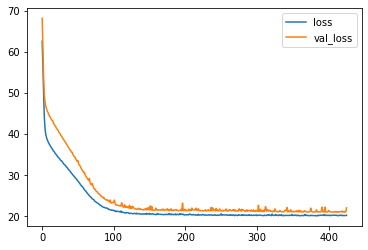

In [20]:
loss = pd.DataFrame(model.history.history)

loss.plot()

In [21]:
test_predictions = model.predict(X_test)

In [22]:
test_predictions = pd.Series(test_predictions.reshape(1748,))

pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [23]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

,Test True Y,Model Predictions
0,-7.530643,-6.088417
1,-5.582522,-2.866756
2,-4.324320,-0.293519
3,-5.263158,-5.373846
4,4.446459,2.133614
...,...,...
1743,-1.361701,-0.306152
1744,2.701671,-1.410862
1745,-6.500402,-2.853210
1746,0.680272,1.130484


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

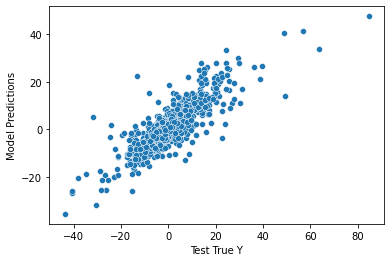

In [208]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data = pred_df)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

3.1180458603944916

In [209]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

22.053085658508216

In [211]:
df.describe()

#we are 3.11 off the mean of .467, ergo model is not good at predicting

,ROC,BOP DAY PRIOR,RSI CLOSE DAY PRIOR,MFI DAY PRIOR,PPO DAY PRIOR,Momentum,ADOSC DAY BEFORE,ULTOSC DAY BEFORE,AROON,ROC 2
count,5826.000000,5826.000000,5826.000000,5.826000e+03,5826.000000,5826.000000,5826.000000,5826.000000,5826.000000,5826.0
mean,0.467696,-0.008723,50.394102,4.971876e+01,0.007429,0.027235,2579.872020,51.069246,0.373326,1.0
std,8.249052,0.573903,22.581785,3.965492e+01,2.186460,1.184001,42676.551416,21.190400,69.707929,0.0
min,-43.790848,-1.000000,0.126337,-9.895206e-12,-19.912764,-11.070004,-284250.223058,0.000000,-100.000000,1.0
25%,-3.703703,-0.500000,32.497097,0.000000e+00,-0.992212,-0.450000,-11115.564231,34.918230,-75.000000,1.0
50%,0.080465,0.000000,50.421114,5.036172e+01,0.031538,0.000000,819.678193,51.289808,0.000000,1.0
75%,4.097466,0.484248,68.050253,1.000000e+02,1.045885,0.500000,15980.980459,66.881548,75.000000,1.0
max,84.666665,1.000000,99.380444,1.000000e+02,16.466362,12.320000,303120.663622,100.000000,100.000000,1.0


In [93]:
Two_Crows = talib.CDL2CROWS(Open,High,Low,Close)

Two_Crows = (Two_Crows).values

Two_Crows = pd.DataFrame(Two_Crows)

Two_Crows.columns = ["Two Crows Day Prior"]

Two_Crows = Two_Crows[0:5835]

Two_Crows

,Two Crows Day Prior
0,0
1,0
2,0
3,0
4,0
...,...
5830,0
5831,0
5832,0
5833,0


In [26]:
#sns.pairplot(df)

In [175]:
ROC2 = talib.ROC(test['Close'],timeperiod=1).values

ROC2 = pd.DataFrame(ROC2[1:])

ROC2.columns = ["ROC 2"]

ROC2

,ROC 2
0,-2.631579
1,-3.783784
2,-2.808989
3,0.578035
4,0.574713
...,...
5830,2.528087
5831,-2.015653
5832,2.117039
5833,-3.070604


In [176]:
for idx, row in ROC2.iterrows():
    if  ROC2.loc[idx,'ROC 2'] > 0:
        ROC2.loc[idx,'ROC 2'] = 1
        
    else: 
    
        ROC2.loc[idx,'ROC 2'] = 0   
        
ROC2

,ROC 2
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
5830,1.0
5831,0.0
5832,1.0
5833,0.0


In [106]:
CDLHAMMER = talib.CDLHAMMER(Open,High,Low,Close)

CDLHAMMER = (CDLHAMMER).values

CDLHAMMER = pd.DataFrame(CDLHAMMER)

CDLHAMMER.columns = ["CDLHAMMER"]

CDLHAMMER = CDLHAMMER[0:5835]

CDLHAMMER

,CDLHAMMER
0,0
1,0
2,0
3,0
4,0
...,...
5830,0
5831,0
5832,0
5833,0


In [110]:
CDLHANGINGMAN = talib.CDLHANGINGMAN(Open,High,Low,Close)

CDLHANGINGMAN = (CDLHANGINGMAN).values

CDLHANGINGMAN = pd.DataFrame(CDLHANGINGMAN)

CDLHANGINGMAN.columns = ["CDLHANGINGMAN"]

CDLHANGINGMAN = CDLHANGINGMAN[0:5835]

CDLHANGINGMAN

,CDLHANGINGMAN
0,0
1,0
2,0
3,0
4,0
...,...
5830,0
5831,0
5832,0
5833,0


In [112]:
CDLHARAMI = talib.CDLHARAMI(Open,High,Low,Close)

CDLHARAMI = (CDLHARAMI).values

CDLHARAMI = pd.DataFrame(CDLHARAMI)

CDLHARAMI.columns = ["CDLHARAMI"]

CDLHARAMI = CDLHARAMI[0:5835]

CDLHARAMI

,CDLHARAMI
0,0
1,0
2,0
3,0
4,0
...,...
5830,0
5831,0
5832,0
5833,0


In [149]:
CDLHARAMICROSS = talib.CDLHARAMICROSS(Open,High,Low,Close)

CDLHARAMICROSS = (CDLHARAMICROSS).values

CDLHARAMICROSS = pd.DataFrame(CDLHARAMICROSS)

CDLHARAMICROSS.columns = ["CDLHARAMICROSS"]

CDLHARAMICROSS = CDLHARAMICROSS[0:5835]

In [150]:
CDLHIGHWAVE = talib.CDLHIGHWAVE(Open,High,Low,Close)

CDLHIGHWAVE = (CDLHIGHWAVE).values

CDLHIGHWAVE = pd.DataFrame(CDLHIGHWAVE)

CDLHIGHWAVE.columns = ["CDLHIGHWAVE"]

CDLHIGHWAVE = CDLHIGHWAVE[0:5835]

In [151]:
CDLHIKKAKE = talib.CDLHIKKAKE(Open,High,Low,Close)

CDLHIKKAKE = (CDLHIKKAKE).values

CDLHIKKAKE = pd.DataFrame(CDLHIKKAKE)

CDLHIKKAKE.columns = ["CDLHIKKAKE"]

CDLHIKKAKE = CDLHIKKAKE[0:5835]

In [152]:
CDLHIKKAKEMOD = talib.CDLHIKKAKEMOD(Open,High,Low,Close)

CDLHIKKAKEMOD = (CDLHIKKAKEMOD).values

CDLHIKKAKEMOD = pd.DataFrame(CDLHIKKAKEMOD)

CDLHIKKAKEMOD.columns = ["CDLHIKKAKEMOD"]

CDLHIKKAKEMOD = CDLHIKKAKEMOD[0:5835]

In [153]:
CDLHOMINGPIGEON = talib.CDLHOMINGPIGEON(Open,High,Low,Close)

CDLHOMINGPIGEON = (CDLHOMINGPIGEON).values

CDLHOMINGPIGEON = pd.DataFrame(CDLHOMINGPIGEON)

CDLHOMINGPIGEON.columns = ["CDLHOMINGPIGEON"]

CDLHOMINGPIGEON = CDLHOMINGPIGEON[0:5835]

In [154]:
CDLDOJI = talib.CDLDOJI(Open,High,Low,Close)

CDLDOJI = (CDLDOJI).values

CDLDOJI = pd.DataFrame(CDLDOJI)

CDLDOJI.columns = ["CDLDOJI"]

CDLDOJI = CDLDOJI[0:5835]

In [155]:
CDLDOJISTAR = talib.CDLDOJISTAR(Open,High,Low,Close)

CDLDOJISTAR = (CDLDOJISTAR).values

CDLDOJISTAR = pd.DataFrame(CDLDOJISTAR)

CDLDOJISTAR.columns = ["CDLDOJISTAR"]

CDLDOJISTAR = CDLDOJISTAR[0:5835]

In [156]:
CDLDRAGONFLYDOJI = talib.CDLDRAGONFLYDOJI(Open,High,Low,Close)

CDLDRAGONFLYDOJI = (CDLDRAGONFLYDOJI).values

CDLDRAGONFLYDOJI = pd.DataFrame(CDLDRAGONFLYDOJI)

CDLDRAGONFLYDOJI.columns = ["CDLDRAGONFLYDOJI"]

CDLDRAGONFLYDOJI = CDLDRAGONFLYDOJI[0:5835]

In [157]:
CDLENGULFING = talib.CDLENGULFING(Open,High,Low,Close)

CDLENGULFING = (CDLENGULFING).values

CDLENGULFING = pd.DataFrame(CDLENGULFING)

CDLENGULFING.columns = ["CDLENGULFING"]

CDLENGULFING = CDLENGULFING[0:5835]

In [158]:
CDLEVENINGDOJISTAR = talib.CDLEVENINGDOJISTAR(Open,High,Low,Close)

CDLEVENINGDOJISTAR = (CDLEVENINGDOJISTAR).values

CDLEVENINGDOJISTAR = pd.DataFrame(CDLEVENINGDOJISTAR)

CDLEVENINGDOJISTAR.columns = ["CDLEVENINGDOJISTAR"]

CDLEVENINGDOJISTAR = CDLEVENINGDOJISTAR[0:5835]

In [159]:
CDLEVENINGSTAR = talib.CDLEVENINGSTAR(Open,High,Low,Close)

CDLEVENINGSTAR = (CDLEVENINGSTAR).values

CDLEVENINGSTAR = pd.DataFrame(CDLEVENINGSTAR)

CDLEVENINGSTAR.columns = ["CDLEVENINGSTAR"]

CDLEVENINGSTAR = CDLEVENINGSTAR[0:5835]

In [160]:
CDLINVERTEDHAMMER = talib.CDLINVERTEDHAMMER(Open,High,Low,Close)

CDLINVERTEDHAMMER = (CDLINVERTEDHAMMER).values

CDLINVERTEDHAMMER = pd.DataFrame(CDLINVERTEDHAMMER)

CDLINVERTEDHAMMER.columns = ["CDLINVERTEDHAMMER"]

CDLINVERTEDHAMMER = CDLINVERTEDHAMMER[0:5835]

In [161]:
CDLLONGLEGGEDDOJI = talib.CDLLONGLEGGEDDOJI(Open,High,Low,Close)

CDLLONGLEGGEDDOJI = (CDLLONGLEGGEDDOJI).values

CDLLONGLEGGEDDOJI = pd.DataFrame(CDLLONGLEGGEDDOJI)

CDLLONGLEGGEDDOJI.columns = ["CDLLONGLEGGEDDOJI"]

CDLLONGLEGGEDDOJI = CDLLONGLEGGEDDOJI[0:5835]

In [162]:
CDLLONGLINE = talib.CDLLONGLINE(Open,High,Low,Close)

CDLLONGLINE = (CDLLONGLINE).values

CDLLONGLINE = pd.DataFrame(CDLLONGLINE)

CDLLONGLINE.columns = ["CDLLONGLINE"]

CDLLONGLINE = CDLLONGLINE[0:5835]

In [163]:
CDLMORNINGDOJISTAR = talib.CDLMORNINGDOJISTAR(Open,High,Low,Close)

CDLMORNINGDOJISTAR = (CDLMORNINGDOJISTAR).values

CDLMORNINGDOJISTAR = pd.DataFrame(CDLMORNINGDOJISTAR)

CDLMORNINGDOJISTAR.columns = ["CDLMORNINGDOJISTAR"]

CDLMORNINGDOJISTAR = CDLMORNINGDOJISTAR[0:5835]

In [164]:
CDLTHRUSTING = talib.CDLTHRUSTING(Open,High,Low,Close)

CDLTHRUSTING = (CDLTHRUSTING).values

CDLTHRUSTING = pd.DataFrame(CDLTHRUSTING)

CDLTHRUSTING.columns = ["CDLTHRUSTING"]

CDLTHRUSTING = CDLTHRUSTING[0:5835]

In [165]:
CDLXSIDEGAP3METHODS = talib.CDLXSIDEGAP3METHODS(Open,High,Low,Close)

CDLXSIDEGAP3METHODS = (CDLXSIDEGAP3METHODS).values

CDLXSIDEGAP3METHODS = pd.DataFrame(CDLXSIDEGAP3METHODS)

CDLXSIDEGAP3METHODS.columns = ["CDLXSIDEGAP3METHODS"]

CDLXSIDEGAP3METHODS = CDLXSIDEGAP3METHODS[0:5835]

In [166]:
CDLUPSIDEGAP2CROWS = talib.CDLUPSIDEGAP2CROWS(Open,High,Low,Close)

CDLUPSIDEGAP2CROWS = (CDLUPSIDEGAP2CROWS).values

CDLUPSIDEGAP2CROWS = pd.DataFrame(CDLUPSIDEGAP2CROWS)

CDLUPSIDEGAP2CROWS.columns = ["CDLUPSIDEGAP2CROWS"]

CDLUPSIDEGAP2CROWS = CDLUPSIDEGAP2CROWS[0:5835]

In [167]:
CDLUNIQUE3RIVER = talib.CDLUNIQUE3RIVER(Open,High,Low,Close)

CDLUNIQUE3RIVER = (CDLUNIQUE3RIVER).values

CDLUNIQUE3RIVER = pd.DataFrame(CDLUNIQUE3RIVER)

CDLUNIQUE3RIVER.columns = ["CDLUNIQUE3RIVER"]

CDLUNIQUE3RIVER = CDLUNIQUE3RIVER[0:5835]

In [168]:
CDLTRISTAR = talib.CDLTRISTAR(Open,High,Low,Close)

CDLTRISTAR = (CDLTRISTAR).values

CDLTRISTAR = pd.DataFrame(CDLTRISTAR)

CDLTRISTAR.columns = ["CDLTRISTAR"]

CDLTRISTAR = CDLTRISTAR[0:5835]

In [169]:
CDLTASUKIGAP = talib.CDLTASUKIGAP(Open,High,Low,Close)

CDLTASUKIGAP = (CDLTASUKIGAP).values

CDLTASUKIGAP = pd.DataFrame(CDLTASUKIGAP)

CDLTASUKIGAP.columns = ["CDLTASUKIGAP"]

CDLTASUKIGAP = CDLTASUKIGAP[0:5835]

In [170]:
new = pd.concat([ROC2,Two_Crows,CDLXSIDEGAP3METHODS,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLTHRUSTING,CDLHAMMER,CDLMORNINGDOJISTAR,CDLHANGINGMAN,CDLHARAMI,CDLEVENINGSTAR,CDLLONGLINE,CDLLONGLEGGEDDOJI,CDLINVERTEDHAMMER,CDLEVENINGDOJISTAR,CDLHARAMICROSS,CDLHIGHWAVE,CDLENGULFING,CDLHIKKAKE,CDLHIKKAKEMOD,CDLDRAGONFLYDOJI,CDLHOMINGPIGEON,CDLDOJI,CDLDOJISTAR],axis=1)

new

new.corr()['ROC 2'].sort_values()

CDLHARAMI             -0.121135
CDLDOJISTAR           -0.093326
CDLHOMINGPIGEON       -0.083232
CDLHAMMER             -0.079561
CDLHARAMICROSS        -0.071625
CDLHANGINGMAN         -0.056754
CDLINVERTEDHAMMER     -0.041270
CDLXSIDEGAP3METHODS   -0.024734
CDLTRISTAR            -0.010235
CDLHIKKAKEMOD         -0.007184
CDLHIKKAKE            -0.005679
CDLDRAGONFLYDOJI      -0.000842
CDLUPSIDEGAP2CROWS     0.001110
CDLDOJI                0.001781
CDLLONGLEGGEDDOJI      0.004878
CDLHIGHWAVE            0.015507
CDLUNIQUE3RIVER        0.019673
CDLEVENINGDOJISTAR     0.023362
CDLTHRUSTING           0.029241
CDLMORNINGDOJISTAR     0.037940
CDLEVENINGSTAR         0.042459
CDLENGULFING           0.081224
CDLLONGLINE            0.284526
ROC 2                  1.000000
Two Crows Day Prior         NaN
Name: ROC 2, dtype: float64

In [213]:
ROC1 = talib.ROC(test['Close'],timeperiod=1).values

ROC1 = pd.DataFrame(ROC1[10:])

ROC1.columns = ["ROC 1"]


ROC2 = talib.ROC(test['Close'],timeperiod=2).values

ROC2 = pd.DataFrame(ROC2[10:])

ROC2.columns = ["ROC 2"]


ROC5 = talib.ROC(test['Close'],timeperiod=5).values

ROC5 = pd.DataFrame(ROC5[10:])

ROC5.columns = ["ROC 5"]


ROC10 = talib.ROC(test['Close'],timeperiod=10).values

ROC10 = pd.DataFrame(ROC10[10:])

ROC10.columns = ["ROC 10"]


roc = pd.concat([ROC1,ROC2,ROC5,ROC10],axis=1)


roc.corr()["ROC 1"].sort_values()


ROC 10    0.325571
ROC 5     0.440096
ROC 2     0.698708
ROC 1     1.000000
Name: ROC 1, dtype: float64

In [215]:
X = roc[['ROC 10','ROC 5','ROC 2']].values
y = roc['ROC 1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
model = Sequential()

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')

model.compile(optimizer='adam',loss='mse')

In [220]:
from keras.callbacks import History 
history = History()

early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=20, restore_best_weights=False)

EarlyStopping()
model.fit(x= X_train,y= y_train,validation_data = (X_test,y_test),batch_size=32,epochs=2000,callbacks=[early_stop])

Epoch 1/2000
128/128 [==============================] - 1s 3ms/step - loss: 14.7397 - val_loss: 14.8835
Epoch 2/2000
128/128 [==============================] - 0s 732us/step - loss: 14.4163 - val_loss: 14.8551
Epoch 3/2000
128/128 [==============================] - 0s 677us/step - loss: 14.3578 - val_loss: 14.8404
Epoch 4/2000
128/128 [==============================] - 0s 685us/step - loss: 14.3324 - val_loss: 14.8366
Epoch 5/2000
128/128 [==============================] - 0s 701us/step - loss: 14.3029 - val_loss: 14.8362
Epoch 6/2000
128/128 [==============================] - 0s 717us/step - loss: 14.3024 - val_loss: 14.8359
Epoch 7/2000
128/128 [==============================] - 0s 709us/step - loss: 14.2979 - val_loss: 14.8360
Epoch 8/2000
128/128 [==============================] - 0s 709us/step - loss: 14.2908 - val_loss: 14.8363
Epoch 9/2000
128/128 [==============================] - 0s 709us/step - loss: 14.2788 - val_loss: 14.8362
Epoch 10/2000
128/128 [=========================

128/128 [==============================] - 0s 724us/step - loss: 12.9601 - val_loss: 12.4540
Epoch 78/2000
128/128 [==============================] - 0s 701us/step - loss: 12.1792 - val_loss: 12.1642
Epoch 79/2000
128/128 [==============================] - 0s 685us/step - loss: 12.2525 - val_loss: 12.2477
Epoch 80/2000
128/128 [==============================] - 0s 724us/step - loss: 12.0497 - val_loss: 12.3308
Epoch 81/2000
128/128 [==============================] - 0s 709us/step - loss: 12.9174 - val_loss: 12.3204
Epoch 82/2000
128/128 [==============================] - 0s 724us/step - loss: 12.6550 - val_loss: 12.0691
Epoch 83/2000
128/128 [==============================] - 0s 709us/step - loss: 12.3811 - val_loss: 11.9945
Epoch 84/2000
128/128 [==============================] - 0s 677us/step - loss: 12.2997 - val_loss: 12.4182
Epoch 85/2000
128/128 [==============================] - 0s 748us/step - loss: 12.4340 - val_loss: 12.1088
Epoch 86/2000
128/128 [============================

128/128 [==============================] - 0s 701us/step - loss: 11.9969 - val_loss: 10.5507
Epoch 154/2000
128/128 [==============================] - 0s 677us/step - loss: 11.5666 - val_loss: 10.4363
Epoch 155/2000
128/128 [==============================] - 0s 677us/step - loss: 11.6893 - val_loss: 10.4490
Epoch 156/2000
128/128 [==============================] - 0s 677us/step - loss: 12.0507 - val_loss: 10.3305
Epoch 157/2000
128/128 [==============================] - 0s 669us/step - loss: 11.4998 - val_loss: 10.5473
Epoch 158/2000
128/128 [==============================] - 0s 677us/step - loss: 11.4808 - val_loss: 10.4188
Epoch 159/2000
128/128 [==============================] - 0s 724us/step - loss: 11.8338 - val_loss: 10.4270
Epoch 160/2000
128/128 [==============================] - 0s 677us/step - loss: 11.5499 - val_loss: 10.3879
Epoch 161/2000
128/128 [==============================] - 0s 677us/step - loss: 11.5702 - val_loss: 10.5235
Epoch 162/2000
128/128 [===================

<AxesSubplot:>

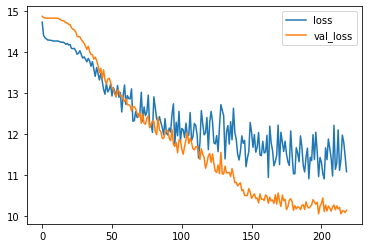

In [221]:
loss = pd.DataFrame(model.history.history)

loss.plot()